# Sales Order data exploration
# Use this notebook to explore sales order 


In [5]:
df = spark.read.format("CSV").option("header","true").load("Files/orders (2)/2019.csv")
display(df.limit(10))

StatementMeta(, e4230cd8-27a4-4975-a227-18b3386be97b, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 032180fa-0db3-4e44-a134-246ca31b876e)

In [2]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

orderschema = StructType([   
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])

df_new = spark.read.format("csv").schema(orderschema).option("header", "true").load("Files/orders (2)/2019.csv")
display(df_new)

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 53a292a1-a990-4508-8815-748924d30519)

In [17]:
Customer = df_new["CustomerName", "Email"]
display(Customer)
print(Customer.count())
print(Customer.distinct().count())

StatementMeta(, e4230cd8-27a4-4975-a227-18b3386be97b, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 1a062d6e-c2dd-44fa-901b-65aee4659a37)

1200
1200


In [21]:
Customers = df_new.select("CustomerName","Email")
display(Customers)

StatementMeta(, e4230cd8-27a4-4975-a227-18b3386be97b, 23, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 464f8a7a-ee5e-485f-bd47-3d7c37d29135)

In [24]:
Customer_new = df_new.select("CustomerName", "Email").where(df_new["Item"]=='Road-250 Red, 52')
display(Customer_new)
print(Customer_new.distinct().count())

StatementMeta(, e4230cd8-27a4-4975-a227-18b3386be97b, 26, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, c4d05b6a-ed1c-4ec2-8915-03abeaedd8d3)

0


In [26]:
Productsales = df_new.select("Item", "Quantity").groupBy("Item").sum()
display(Productsales)

StatementMeta(, e4230cd8-27a4-4975-a227-18b3386be97b, 28, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, fc054b9b-86bd-4b43-bc4a-83b7fe808478)

In [33]:
from pyspark.sql.functions import *

yearlySales = df_new.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")

display(yearlySales)

StatementMeta(, e4230cd8-27a4-4975-a227-18b3386be97b, 35, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, e57eb29d-7c94-4fb2-af3b-742e12a0aa35)

In [35]:
from pyspark.sql.functions import *

yearlysales = df_new.select(year(col("OrderDate")).alias("Year")).groupBy("Year").count().orderBy("Year")
display(yearlysales)

StatementMeta(, e4230cd8-27a4-4975-a227-18b3386be97b, 37, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 0a967364-7fc1-4d0f-936b-8d509dcff3b6)

# Data Transformation

In [3]:
from pyspark.sql.functions import *

# Create Year and Month columns
transformed_df = df_new.withColumn("Year", year(col("OrderDate"))).withColumn("Month", month(col("OrderDate")))

# Create the new FirstName and LastName fields
transformed_df = transformed_df.withColumn("FirstName", split(col("CustomerName"), " ").getItem(0)).withColumn("LastName", split(col("CustomerName"), " ").getItem(1))

# Filter and reorder columns
transformed_df = transformed_df["SalesOrderNumber", "SalesOrderLineNumber", "OrderDate", "Year", "Month", "FirstName", "LastName", "Email", "Item", "Quantity", "UnitPrice", "Tax"]

# Display the first five orders
display(transformed_df.limit(5))

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 342b726c-f340-4892-b8e2-74f61a15abd1)

In [5]:
transformed_df.write.mode("overwrite").parquet("Files/transformed_df/orders (2)")

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 7, Finished, Available, Finished)

# load the newly saved file

In [9]:
order_df = spark.read.format("parquet").load("Files/transformed_df/orders (2)")
display(order_df)

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 11, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f3713bcc-539e-4482-a2e8-304aa8f1e8e9)

# Saving by Partition 


In [12]:
order_df.write.partitionBy("Year", "Month").mode("overwrite").format("parquet").parquet("Files/partitioned_data")
print("saved the partitioned data !")

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 14, Finished, Available, Finished)

saved the partitioned data !


In [17]:
partitiond_df= spark.read.format("parquet").load("Files/partitioned_data/Year=2019/Month=8")
display(partitiond_df)

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 19, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 989d0124-5e10-423d-828c-d4d5dfd145ce)

In [18]:
df_new.write.format("delta").saveAsTable("salesorder")

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 20, Finished, Available, Finished)

# Reading from the newly saved  table using SQL script

In [28]:
df = spark.sql("SELECT * FROM salesorder")

display(df)

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 30, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 55e3be27-1de0-4ff1-85b8-23dab857f1e4)

In [29]:
%%sql
SELECT Year(OrderDate) As OrderYEAR, 
SUM((UnitPrice * Quantity)+ Tax) AS GrossRevenue
FROM salesorder
Group BY YEAR(OrderDate)
ORDER BY OrderYear;


StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 31, Finished, Available, Finished)

<Spark SQL result set with 1 rows and 2 fields>

In [31]:
%%sql 
SELECT * FROM salesorder

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 32, Finished, Available, Finished)

<Spark SQL result set with 1000 rows and 9 fields>

# Vizualization 



In [37]:

sqlQuery ="SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue, \
                COUNT(DISTINCT SalesOrderNumber) AS YearlyCounts \
            FROM salesorder \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 38, Finished, Available, Finished)

+---------+------------------+------------+
|OrderYear|      GrossRevenue|YearlyCounts|
+---------+------------------+------------+
|     2019|4168497.9807128906|        1200|
+---------+------------------+------------+



StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 41, Finished, Available, Finished)

Text(0, 0.5, 'Revenue')

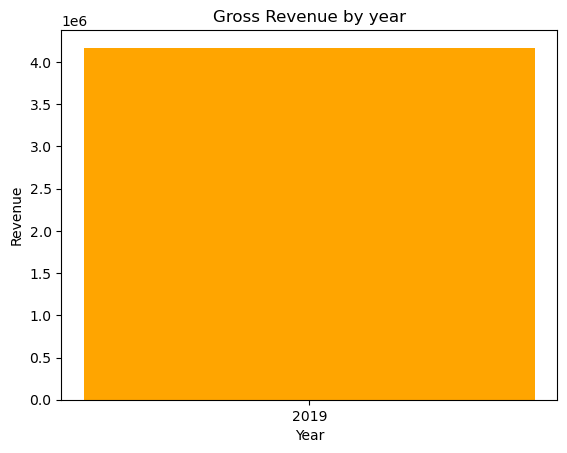

In [40]:
from matplotlib import pyplot as plt
df_sales = df_spark.toPandas()
plt.bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='Orange')
plt.title("Gross Revenue by year")
plt.xlabel("Year")
plt.ylabel("Revenue")

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 42, Finished, Available, Finished)

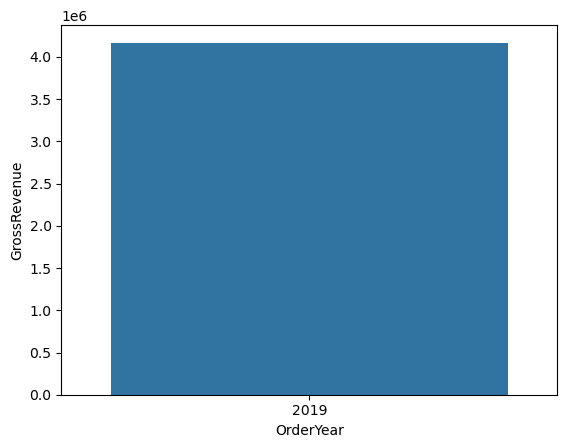

In [41]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()

StatementMeta(, 4ee8d528-531e-4ce7-83c9-810bdb8c7eea, 43, Finished, Available, Finished)

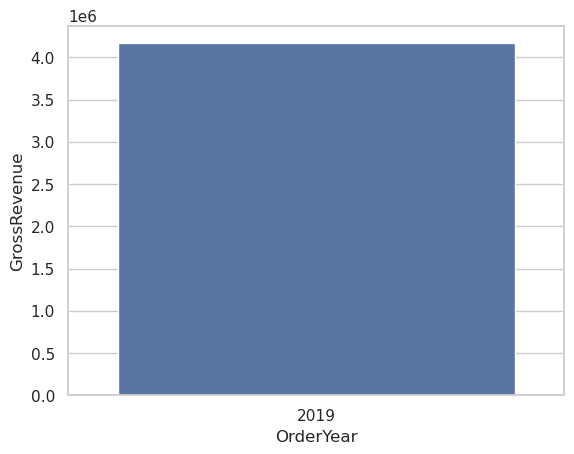

In [42]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)

plt.show()